<img src="https://www.kaggle.com/static/images/logos/kaggle-logo-transparent-300.png" width="300">

<img src="https://site.crateus.ufc.br/wp-content/uploads/2023/03/logotipo-ufc-horizontal-color.png" width="400">


# *dataset Heart Disease*
O conjunto descreve as codição médicas dos paciente.


[Heart Disease | Kaggle](https://www.kaggle.com/datasets/oktayrdeki/heart-disease)

Colaboradores: [Oktay Ördekçi](https://www.kaggle.com/oktayrdeki)

---

## Sobre o Conjunto de Dados:
Este conjunto de dados contém vários indicadores de saúde e fatores de risco relacionados a doenças cardíacas. Parâmetros como idade, gênero, pressão arterial, níveis de colesterol, hábitos de fumo e padrões de exercício foram coletados para analisar o risco de doenças cardíacas e contribuir para pesquisas em saúde. O conjunto de dados pode ser utilizado por profissionais de saúde, pesquisadores e analistas de dados para examinar tendências relacionadas a doenças cardíacas, identificar fatores de risco e realizar diversas análises relacionadas à saúde.


> **Arquivos fonte**
1. heart_disease.csv


> **Número de instâncias**
*   Linhas: 10.000
*   Colunas: 21


> **Periodo de tempo**: Não consta


> **Estrutura de coluna:** Cada coluna em heart_disease.csv são dados médicos dos pacientes

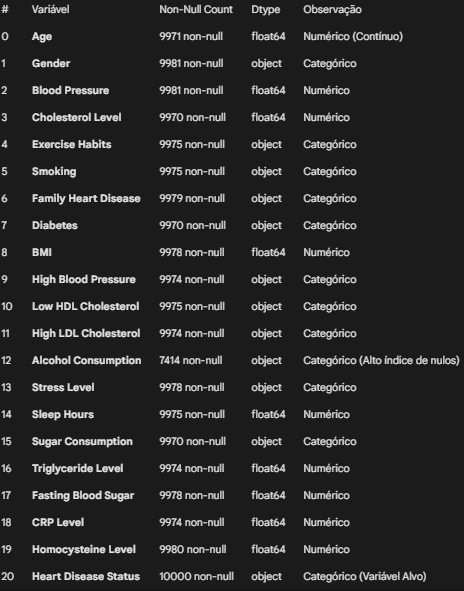

---
## Configuração Kaggle

>**Sincronização Automática:** Desligado
---
## Licença de Uso e Questões Éticas/Privacidade
> **Licença de Uso:**
Sem licença


>**Questões Éticas e de Privacidade:**
Não consta
---


<a href="https://github.com/kbanaVitu/TrabalhoCienciadosDados" target="_blank">
  <img
    src="https://img.shields.io/badge/GitHub-100000?style=flat&logo=github&logoColor=white"
    alt="GitHub Icon"
    width="110"
    style="vertical-align: middle; margin-right: 5px;"
  />
</a>

# **Import's**

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


#Teste de Wilcoxon
from scipy.stats import wilcoxon


from sklearn.preprocessing import MinMaxScaler, OneHotEncoder, LabelEncoder, Normalizer


# Correlação de pearsonr
from scipy.stats import pearsonr

#Validação Cruzada, Holdout, GridSearch
from sklearn.model_selection import train_test_split, KFold, ParameterGrid

from sklearn.utils.validation import column_or_1d

#Balanceamento de classe
from imblearn.under_sampling import NearMiss


#Modelos
!pip install xgboost
from xgboost import XGBClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC

#Métricas
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, ConfusionMatrixDisplay

# **Importando a pasta "TrabalhoFinal_IA" do Google Drive**

In [2]:
from google.colab import drive
drive.mount('/content/drive')
%cd '/content/drive/MyDrive/IA/TrabalhoFinal_IA'

Mounted at /content/drive
/content/drive/MyDrive/IA/TrabalhoFinal_IA


# **Extraindo e mostrando o Dataset**


In [3]:
# import zipfile
# with zipfile.ZipFile('HeartDisease.zip', 'r') as zip_ref:
#     zip_ref.extractall('/content/drive/MyDrive/IA/TrabalhoFinal_IA')

# **Visualizando o arquivo**

In [4]:
pd.set_option('display.max_columns', None)
df_heart = pd.read_csv('heart_disease.csv')
df_heart

,Age,Gender,Blood Pressure,Cholesterol Level,Exercise Habits,Smoking,Family Heart Disease,Diabetes,BMI,High Blood Pressure,Low HDL Cholesterol,High LDL Cholesterol,Alcohol Consumption,Stress Level,Sleep Hours,Sugar Consumption,Triglyceride Level,Fasting Blood Sugar,CRP Level,Homocysteine Level,Heart Disease Status
0,56.0,Male,153.0,155.0,High,Yes,Yes,No,24.991591,Yes,Yes,No,High,Medium,7.633228,Medium,342.0,NaN,12.969246,12.387250,No
1,69.0,Female,146.0,286.0,High,No,Yes,Yes,25.221799,No,Yes,No,Medium,High,8.744034,Medium,133.0,157.0,9.355389,19.298875,No
2,46.0,Male,126.0,216.0,Low,No,No,No,29.855447,No,Yes,Yes,Low,Low,4.440440,Low,393.0,92.0,12.709873,11.230926,No
3,32.0,Female,122.0,293.0,High,Yes,Yes,No,24.130477,Yes,No,Yes,Low,High,5.249405,High,293.0,94.0,12.509046,5.961958,No
4,60.0,Male,166.0,242.0,Low,Yes,Yes,Yes,20.486289,Yes,No,No,Low,High,7.030971,High,263.0,154.0,10.381259,8.153887,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,25.0,Female,136.0,243.0,Medium,Yes,No,No,18.788791,Yes,No,Yes,Medium,High,6.834954,Medium,343.0,133.0,3.588814,19.132004,Yes
9996,38.0,Male,172.0,154.0,Medium,No,No,No,31.856801,Yes,No,Yes,NaN,High,8.247784,Low,377.0,83.0,2.658267,9.715709,Yes
9997,73.0,Male,152.0,201.0,High,Yes,No,Yes,26.899911,No,Yes,Yes,NaN,Low,4.436762,Low,248.0,88.0,4.408867,9.492429,Yes
9998,23.0,Male,142.0,299.0,Low,Yes,No,Yes,34.964026,Yes,No,Yes,Medium,High,8.526329,Medium,113.0,153.0,7.215634,11.873486,Yes


In [5]:
df_heart.info()
df_heart.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Age                   9971 non-null   float64
 1   Gender                9981 non-null   object 
 2   Blood Pressure        9981 non-null   float64
 3   Cholesterol Level     9970 non-null   float64
 4   Exercise Habits       9975 non-null   object 
 5   Smoking               9975 non-null   object 
 6   Family Heart Disease  9979 non-null   object 
 7   Diabetes              9970 non-null   object 
 8   BMI                   9978 non-null   float64
 9   High Blood Pressure   9974 non-null   object 
 10  Low HDL Cholesterol   9975 non-null   object 
 11  High LDL Cholesterol  9974 non-null   object 
 12  Alcohol Consumption   7414 non-null   object 
 13  Stress Level          9978 non-null   object 
 14  Sleep Hours           9975 non-null   float64
 15  Sugar Consumption   

,Age,Blood Pressure,Cholesterol Level,BMI,Sleep Hours,Triglyceride Level,Fasting Blood Sugar,CRP Level,Homocysteine Level
count,9971.000000,9981.000000,9970.000000,9978.000000,9975.000000,9974.000000,9978.000000,9974.000000,9980.000000
mean,49.296259,149.757740,225.425577,29.077269,6.991329,250.734409,120.142213,7.472201,12.456271
std,18.193970,17.572969,43.575809,6.307098,1.753195,87.067226,23.584011,4.340248,4.323426
min,18.000000,120.000000,150.000000,18.002837,4.000605,100.000000,80.000000,0.003647,5.000236
25%,34.000000,134.000000,187.000000,23.658075,5.449866,176.000000,99.000000,3.674126,8.723334
50%,49.000000,150.000000,226.000000,29.079492,7.003252,250.000000,120.000000,7.472164,12.409395
75%,65.000000,165.000000,263.000000,34.520015,8.531577,326.000000,141.000000,11.255592,16.140564
max,80.000000,180.000000,300.000000,39.996954,9.999952,400.000000,160.000000,14.997087,19.999037


In [6]:
df_heart.isnull().sum()

,0
Age,29
Gender,19
Blood Pressure,19
Cholesterol Level,30
Exercise Habits,25
Smoking,25
Family Heart Disease,21
Diabetes,30
BMI,22
High Blood Pressure,26


# **Análise Exploratória**

Gerando gráficos da distribuição ORIGINAL...


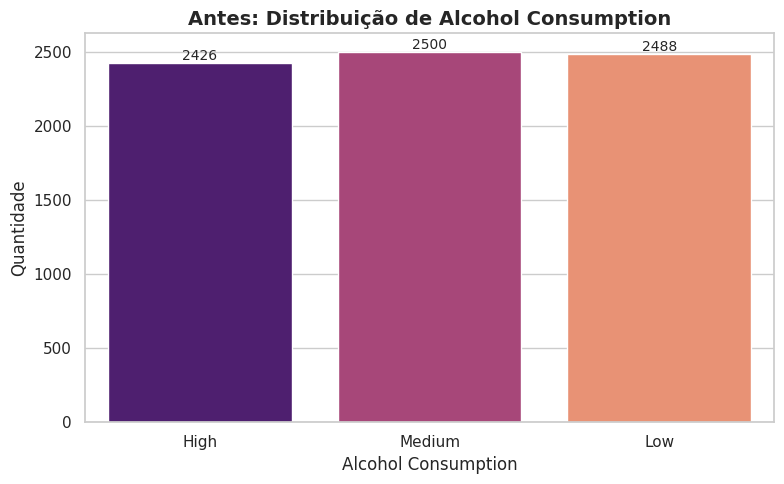

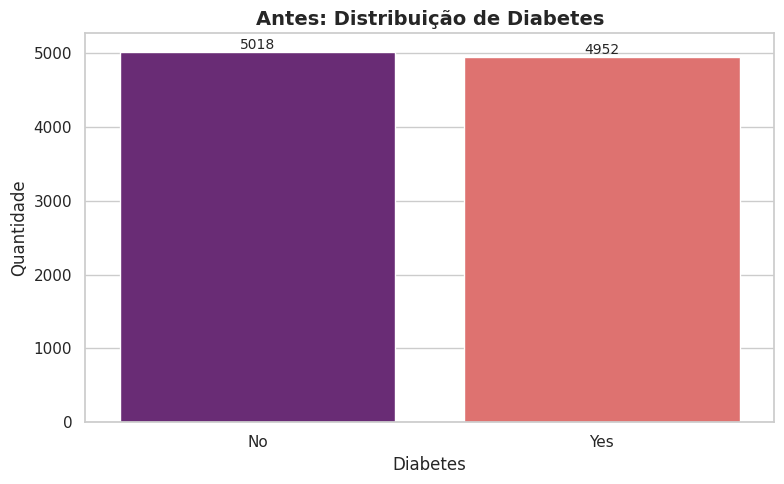

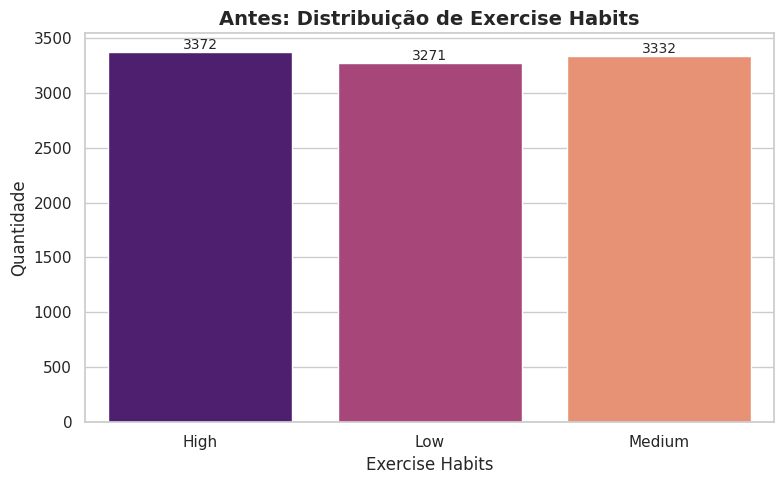

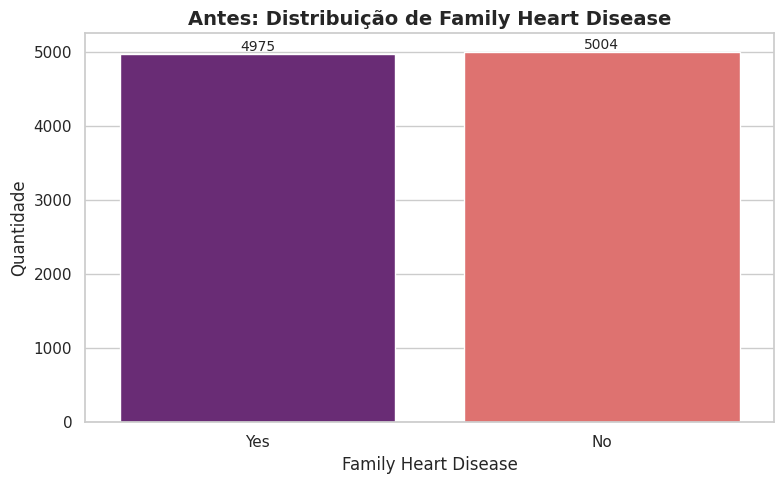

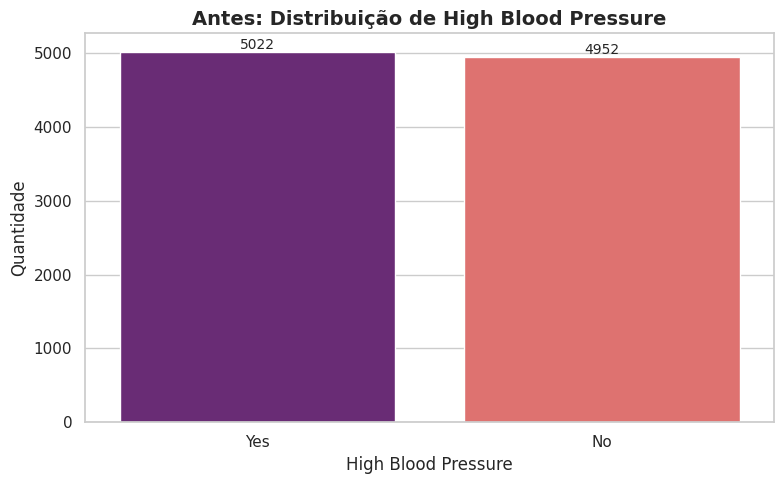

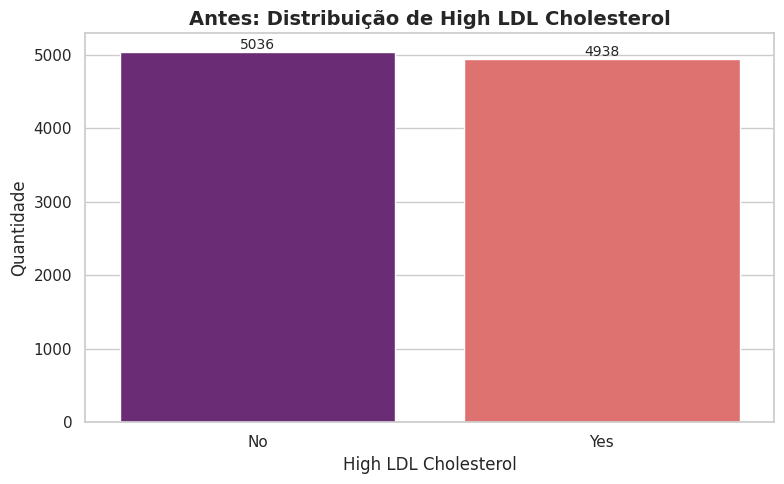

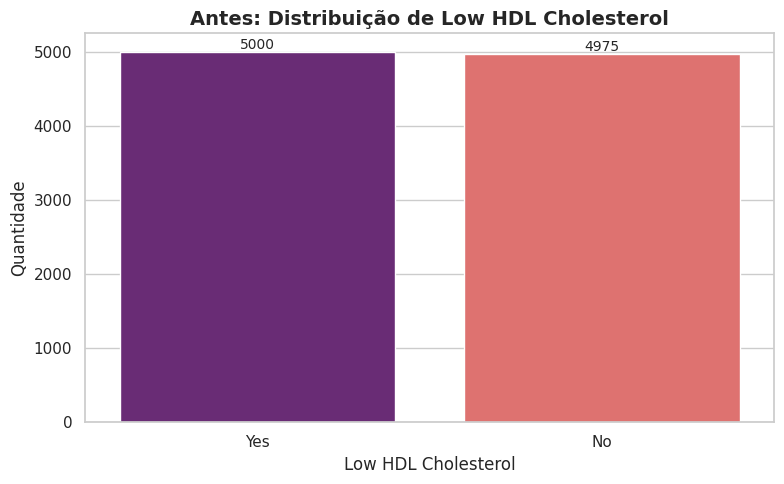

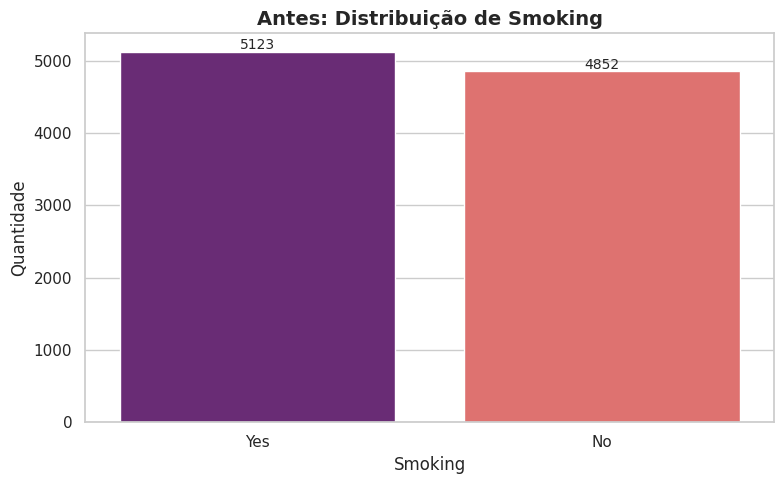

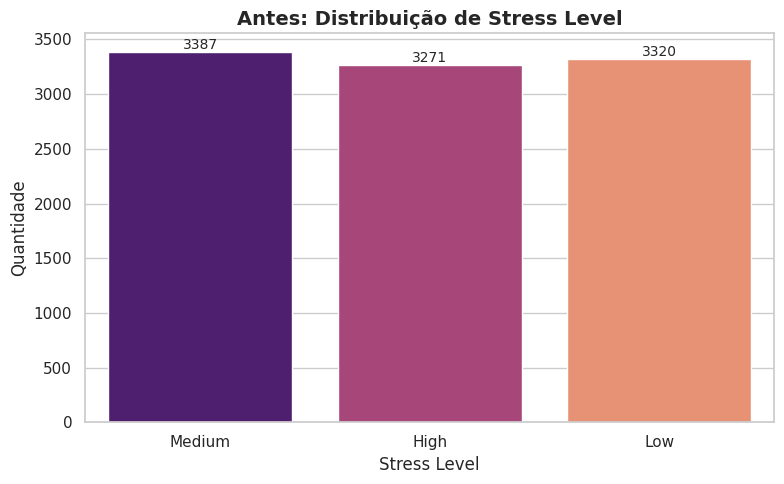

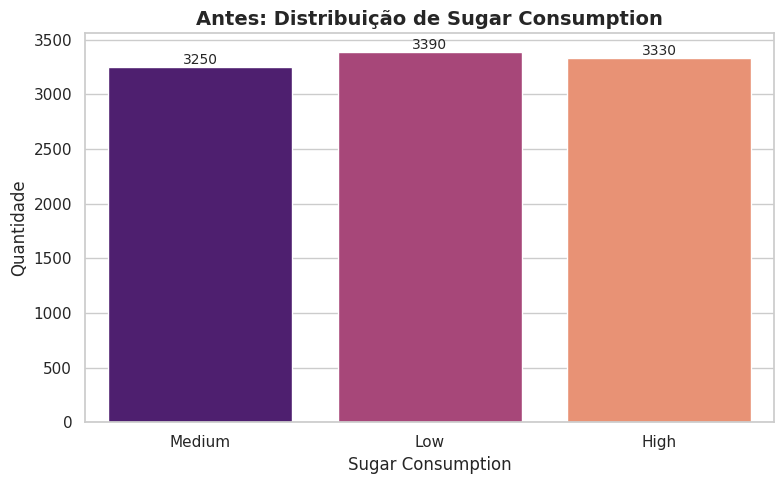

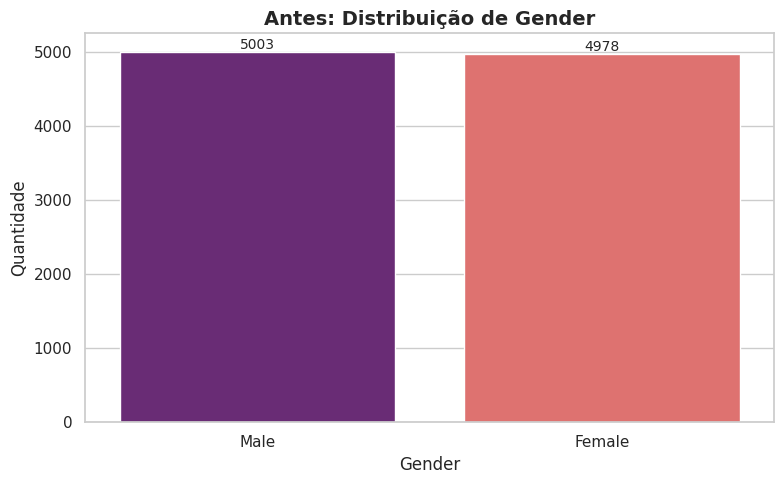

In [7]:
features = [
    'Alcohol Consumption', 'Diabetes', 'Exercise Habits',
    'Family Heart Disease', 'High Blood Pressure', 'High LDL Cholesterol',
    'Low HDL Cholesterol', 'Smoking', 'Stress Level', 'Sugar Consumption', 'Gender'
]


sns.set_theme(style="whitegrid")

def gerar_graficos_antes(df):
    print("Gerando gráficos da distribuição ORIGINAL...")
    for col in features:
        plt.figure(figsize=(8, 5))
        ax = sns.countplot(data=df, x=col, palette='magma', hue=col, legend=False)

        plt.title(f'Antes: Distribuição de {col}', fontsize=14, fontweight='bold')
        plt.xlabel(col)
        plt.ylabel('Quantidade')

        for p in ax.patches:
            ax.annotate(f'{int(p.get_height())}', (p.get_x() + p.get_width() / 2., p.get_height()),
                        ha='center', va='center', fontsize=10, xytext=(0, 5), textcoords='offset points')

        plt.tight_layout()
        plt.show()

gerar_graficos_antes(df_heart)

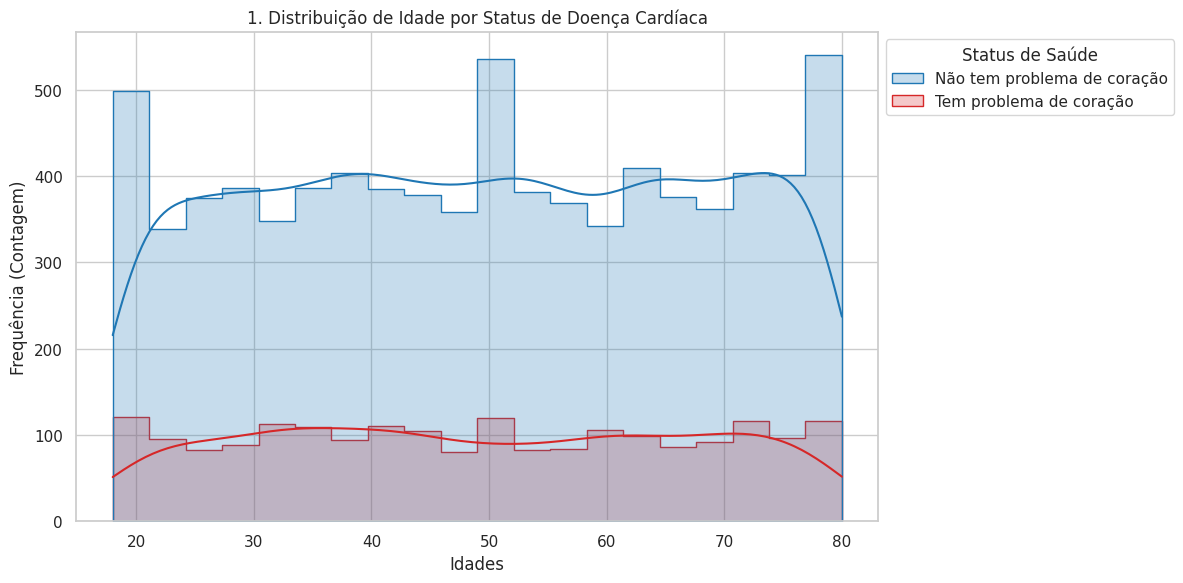

In [8]:
# 1. Distribuição da Idade
df_plot = df_heart.copy()
df_plot['Age'] = pd.to_numeric(df_plot['Age'], errors='coerce').astype('Int64')
mapeamento = {
    'No': 'Não tem problema de coração',
    'Yes': 'Tem problema de coração',
}
df_plot['Heart Disease Status'] = df_plot['Heart Disease Status'].map(mapeamento)
plt.figure(figsize=(12, 6))
cores_fortes = ["#1f77b4", "#d62728"]
ax = sns.histplot(data=df_plot, x='Age', hue='Heart Disease Status', kde=True, palette=cores_fortes, bins=20, element="step")
sns.move_legend(ax, "upper left", bbox_to_anchor=(1, 1), title='Status de Saúde')
plt.title('1. Distribuição de Idade por Status de Doença Cardíaca')
plt.xlabel('Idades', fontsize=12)
plt.ylabel('Frequência (Contagem)', fontsize=12)
plt.tight_layout()
plt.show()

/tmp/ipython-input-3434168986.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df_heart, x='Heart Disease Status', y='BMI', palette='Set3')


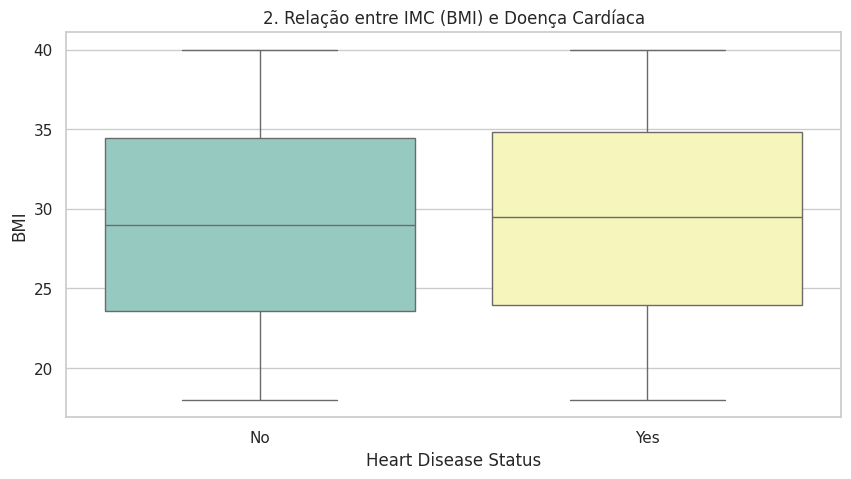

In [9]:
# 2. IMC vs Status de Doença Cardíaca
plt.figure(figsize=(10, 5))
sns.boxplot(data=df_heart, x='Heart Disease Status', y='BMI', palette='Set3')
plt.title('2. Relação entre IMC (BMI) e Doença Cardíaca')
plt.show()

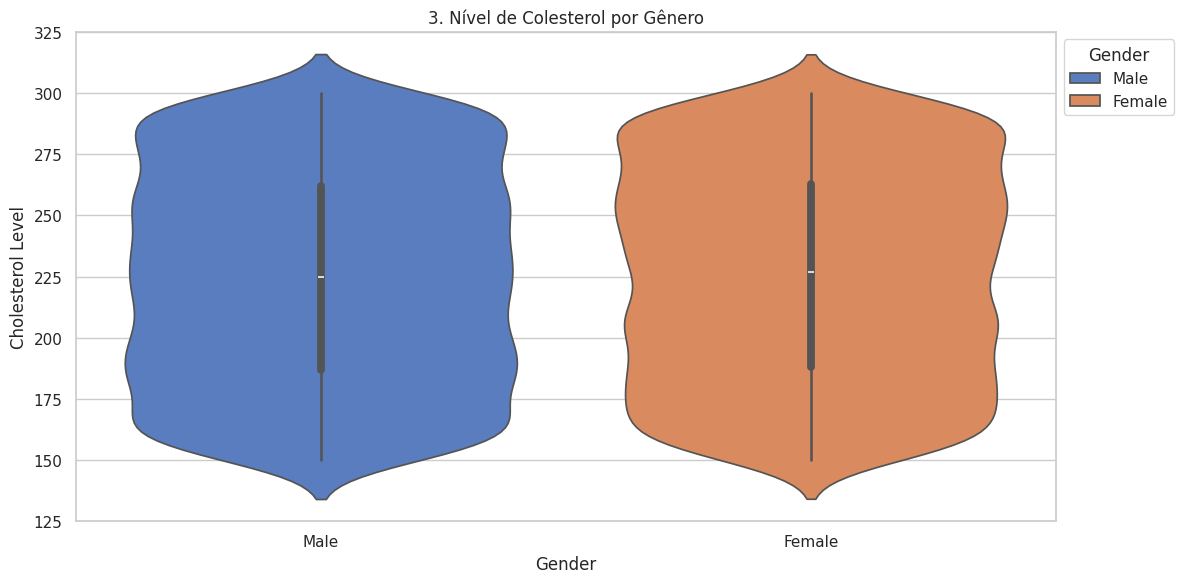

In [10]:
plt.figure(figsize=(12, 6))
ax = sns.violinplot(data=df_heart, x='Gender', y='Cholesterol Level', hue='Gender', palette='muted')
sns.move_legend(ax, "upper left", bbox_to_anchor=(1, 1))
plt.title('3. Nível de Colesterol por Gênero')
plt.tight_layout()
plt.show()

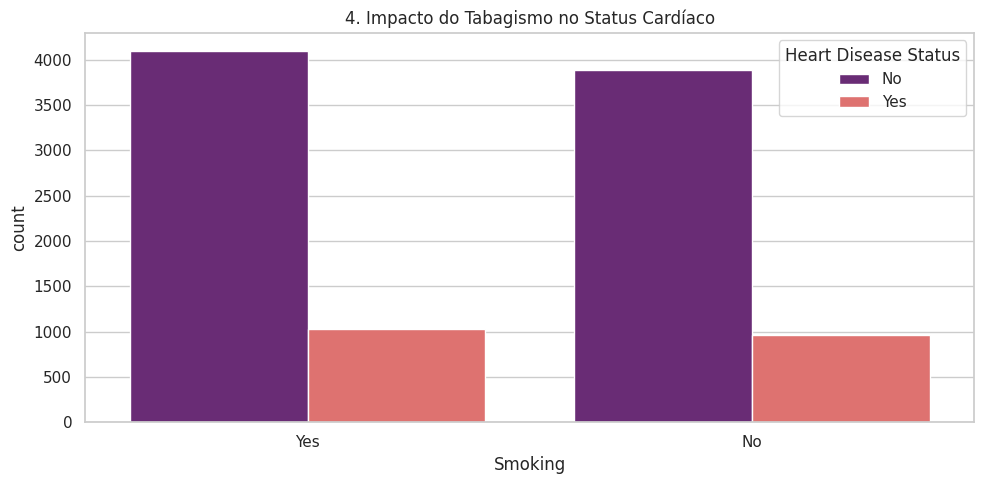

In [11]:
# 4. Hábito de Fumar vs Doença Cardíaca
plt.figure(figsize=(10, 5))
sns.countplot(data=df_heart, x='Smoking', hue='Heart Disease Status', palette='magma')
sns.move_legend(ax, "upper left", bbox_to_anchor=(1, 1))
plt.title('4. Impacto do Tabagismo no Status Cardíaco')
plt.tight_layout()
plt.show()

/tmp/ipython-input-3556948542.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df_heart, x='Stress Level', y='Sleep Hours', order=['Low', 'Medium', 'High'], palette='viridis')


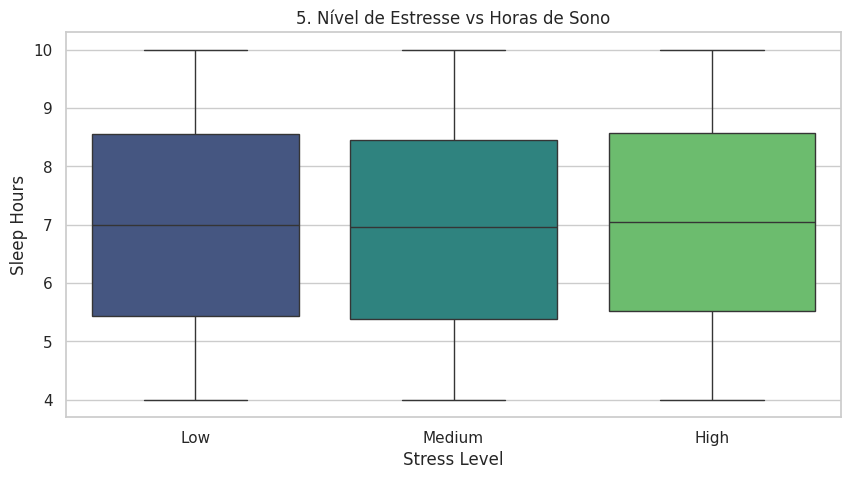

In [12]:
# 5. Estresse vs Horas de Sono
plt.figure(figsize=(10, 5))
sns.boxplot(data=df_heart, x='Stress Level', y='Sleep Hours', order=['Low', 'Medium', 'High'], palette='viridis')
plt.title('5. Nível de Estresse vs Horas de Sono')
plt.show()

/tmp/ipython-input-604117690.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=df_heart, x='Sugar Consumption', y='Triglyceride Level', order=['Low', 'Medium', 'High'], palette='viridis')


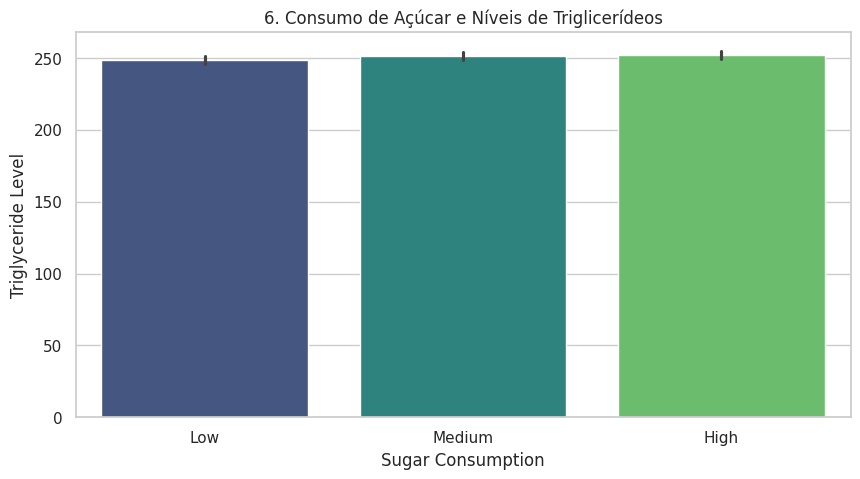

In [13]:
# 6. Consumo de Açúcar vs Triglicerídeos
plt.figure(figsize=(10, 5))
sns.barplot(data=df_heart, x='Sugar Consumption', y='Triglyceride Level', order=['Low', 'Medium', 'High'], palette='viridis')
plt.title('6. Consumo de Açúcar e Níveis de Triglicerídeos')
plt.show()

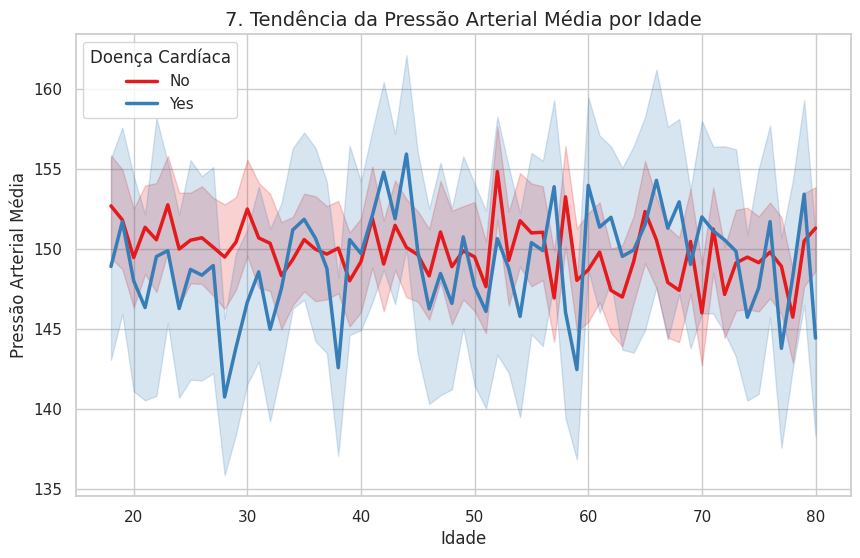

In [14]:
# 7. Tendência da Pressão Arterial por Idade (Substituindo o Scatterplot)
plt.figure(figsize=(10, 6))
sns.lineplot(data=df_heart, x='Age', y='Blood Pressure', hue='Heart Disease Status', palette='Set1', linewidth=2.5)
plt.title('7. Tendência da Pressão Arterial Média por Idade', fontsize=14)
plt.xlabel('Idade', fontsize=12)
plt.ylabel('Pressão Arterial Média', fontsize=12)
plt.legend(title='Doença Cardíaca')
plt.show()

/tmp/ipython-input-2075525855.py:22: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df_plot, x='Heart Disease Status', palette='pastel', ax=ax[1])


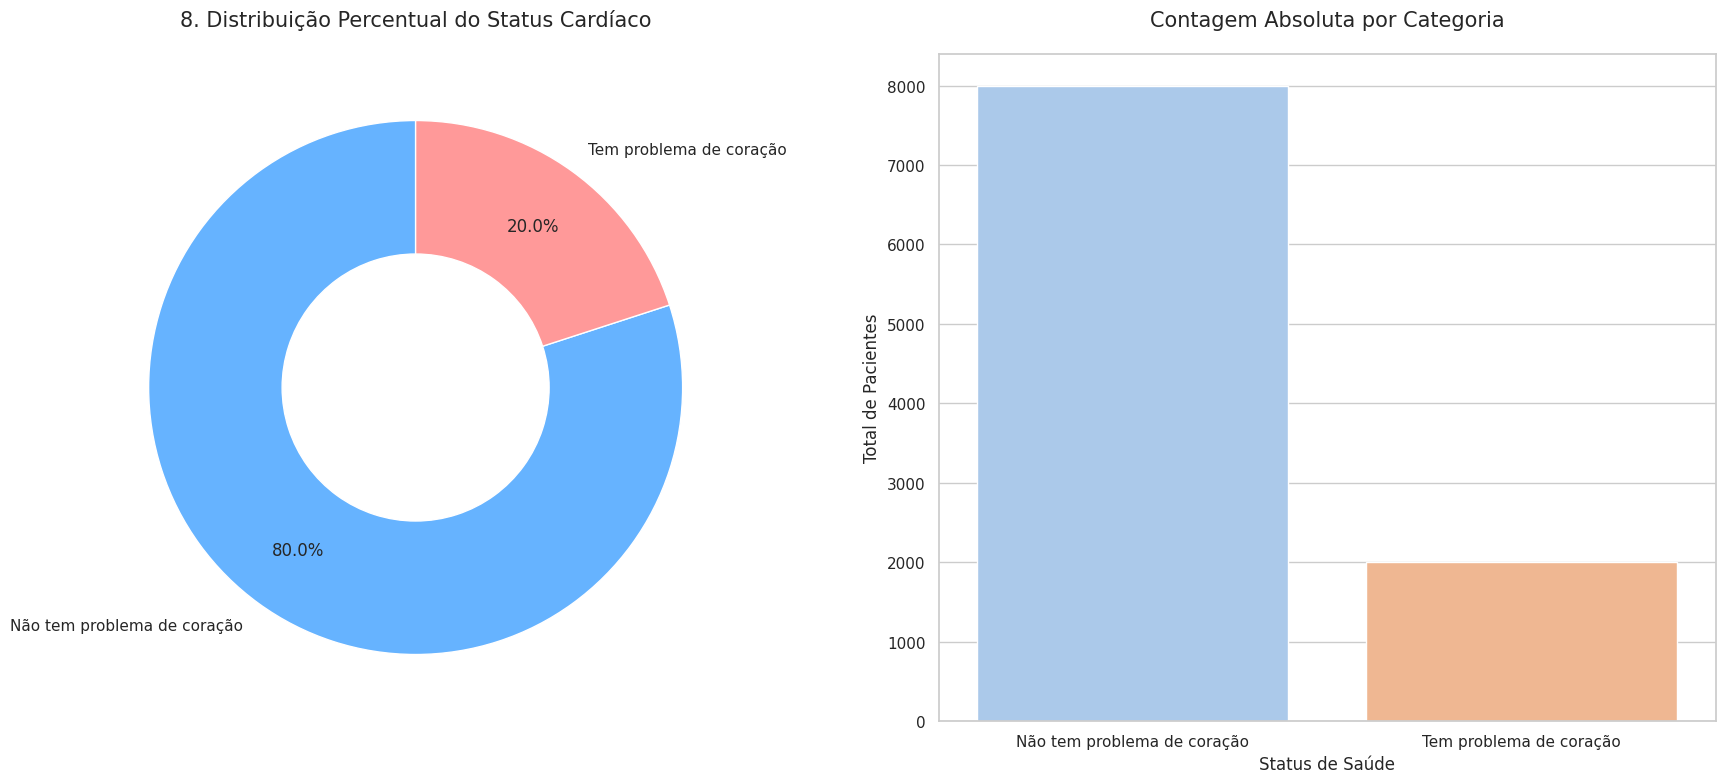

In [15]:
#8 Porcentagem da classe
df_plot = df_heart.copy()
mapeamento = {
    'No' : 'Não tem problema de coração',
    'Yes' : 'Tem problema de coração'
}
df_plot['Heart Disease Status'] = df_plot['Heart Disease Status'].map(mapeamento)
sns.set_theme(style="whitegrid")
fig, ax = plt.subplots(1, 2, figsize=(18, 8))
target_counts = df_plot['Heart Disease Status'].value_counts()
wedges, texts, autotexts = ax[0].pie(
    target_counts,
    labels=target_counts.index,
    autopct='%1.1f%%',
    startangle=90,
    colors=['#66b3ff','#ff9999'],
    wedgeprops={'width': 0.5, 'edgecolor': 'w'},
    pctdistance=0.75,
    labeldistance=1.1
)
ax[0].set_title('8. Distribuição Percentual do Status Cardíaco', fontsize=15, pad=20)
sns.countplot(data=df_plot, x='Heart Disease Status', palette='pastel', ax=ax[1])
ax[1].set_title('Contagem Absoluta por Categoria', fontsize=15, pad=20)
ax[1].set_xlabel('Status de Saúde', fontsize=12)
ax[1].set_ylabel('Total de Pacientes', fontsize=12)
plt.tight_layout()
plt.show()

**Porcentagem de dados faltantes em cada feature**

In [16]:
faltantes_percentual = (df_heart.isnull().mean() * 100).sort_values(ascending=False)

print("\nColunas com dados ausentes (> 0%):")
print(faltantes_percentual[faltantes_percentual > 0])


Colunas com dados ausentes (> 0%):
Alcohol Consumption     25.86
Diabetes                 0.30
Sugar Consumption        0.30
Cholesterol Level        0.30
Age                      0.29
Triglyceride Level       0.26
CRP Level                0.26
High LDL Cholesterol     0.26
High Blood Pressure      0.26
Low HDL Cholesterol      0.25
Sleep Hours              0.25
Exercise Habits          0.25
Smoking                  0.25
Fasting Blood Sugar      0.22
BMI                      0.22
Stress Level             0.22
Family Heart Disease     0.21
Homocysteine Level       0.20
Blood Pressure           0.19
Gender                   0.19
dtype: float64


# **Pré-processamento**

**Transformando a feature Age para inteiro**

In [17]:
df_heart['Age'] = df_heart['Age'].astype('Int64')
print(df_heart['Age'].head())

0    56
1    69
2    46
3    32
4    60
Name: Age, dtype: Int64


**Tratando dados faltantes**

In [18]:
# Identificar colunas categóricas
cat_cols = df_heart.select_dtypes(include=['object']).columns  # Pegando apenas colunas categóricas

# Preencher os NaN com a moda de cada coluna categórica
for col in cat_cols:
    df_heart[col] = df_heart[col].fillna(df_heart[col].mode()[0])

# colunas numéricas
num_cols = df_heart.select_dtypes(include=['number']).columns  # Pegando apenas colunas numéricas

# Preencher os NaN com a mediana de cada coluna numerica
for c in num_cols:
    df_heart[c] = df_heart[c].fillna(df_heart[c].median())

df_heart.isnull().sum()

,0
Age,0
Gender,0
Blood Pressure,0
Cholesterol Level,0
Exercise Habits,0
Smoking,0
Family Heart Disease,0
Diabetes,0
BMI,0
High Blood Pressure,0


In [19]:
df_heart.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Age                   10000 non-null  Int64  
 1   Gender                10000 non-null  object 
 2   Blood Pressure        10000 non-null  float64
 3   Cholesterol Level     10000 non-null  float64
 4   Exercise Habits       10000 non-null  object 
 5   Smoking               10000 non-null  object 
 6   Family Heart Disease  10000 non-null  object 
 7   Diabetes              10000 non-null  object 
 8   BMI                   10000 non-null  float64
 9   High Blood Pressure   10000 non-null  object 
 10  Low HDL Cholesterol   10000 non-null  object 
 11  High LDL Cholesterol  10000 non-null  object 
 12  Alcohol Consumption   10000 non-null  object 
 13  Stress Level          10000 non-null  object 
 14  Sleep Hours           10000 non-null  float64
 15  Sugar Consumption   

**OneHotEncoder**

**Verificando valores após os tratamento dos dados**

Gerando gráficos da distribuição APÓS TRATAMENTO...


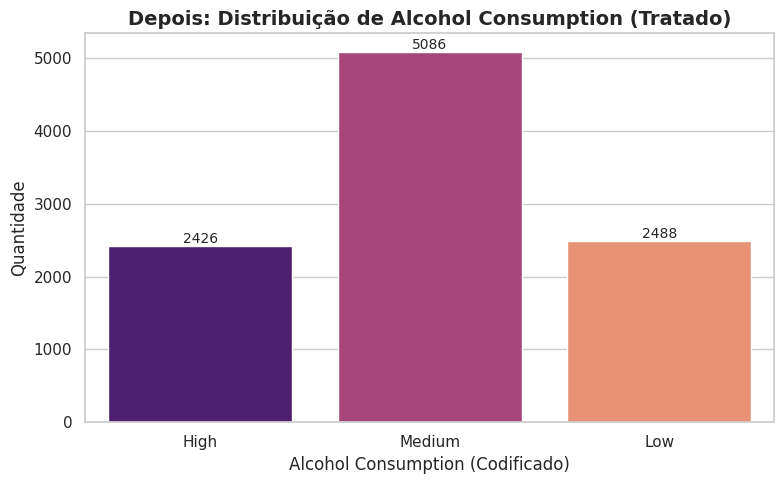

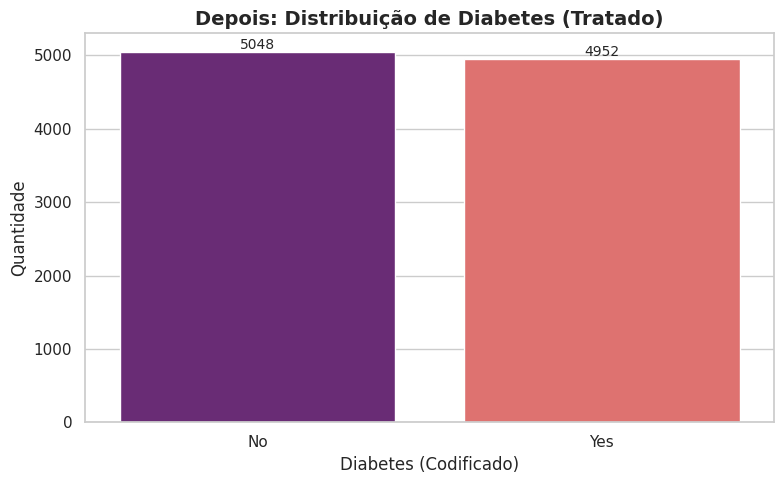

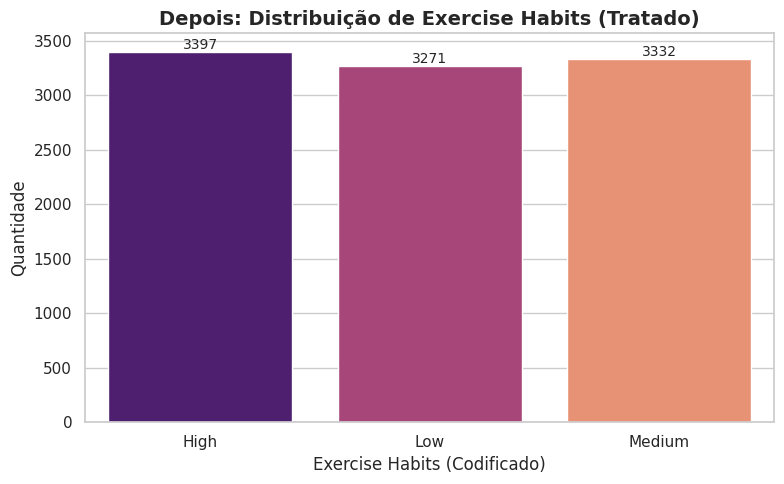

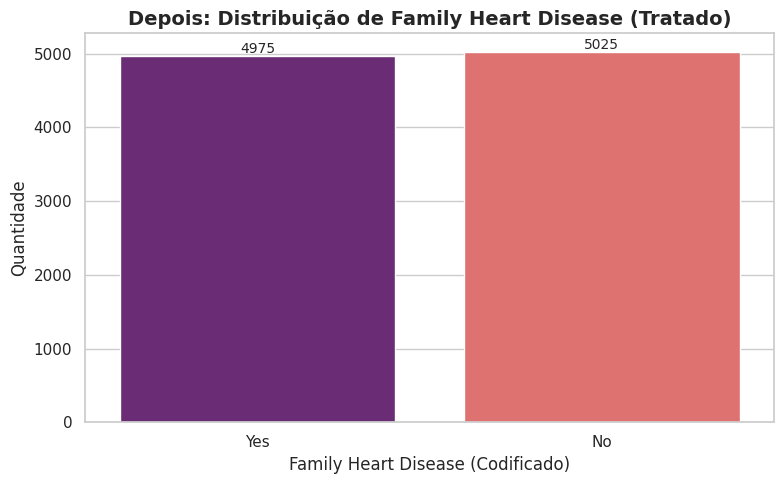

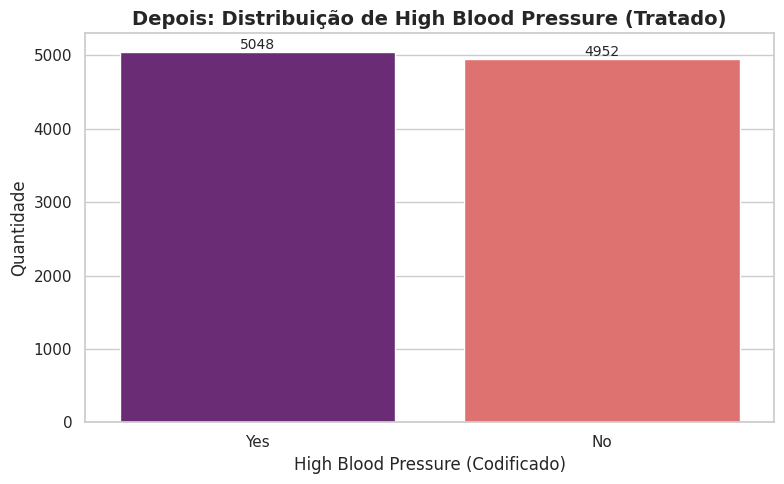

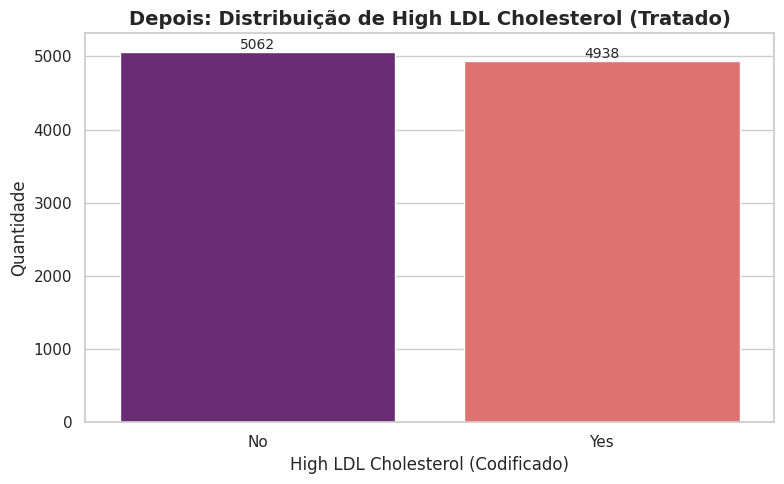

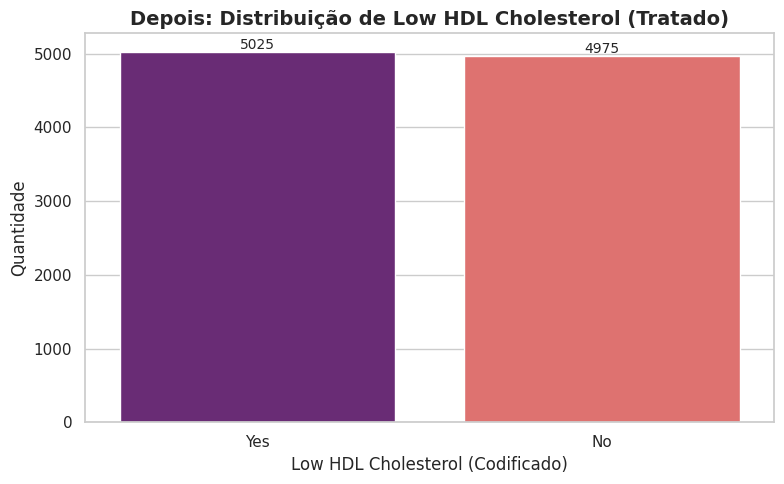

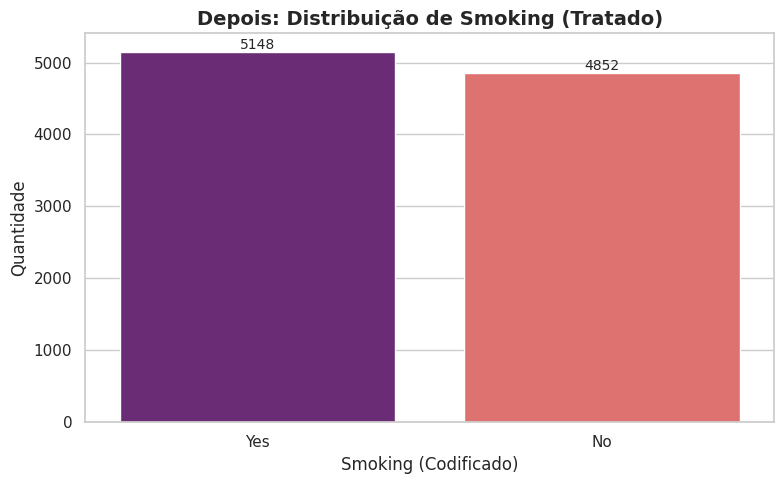

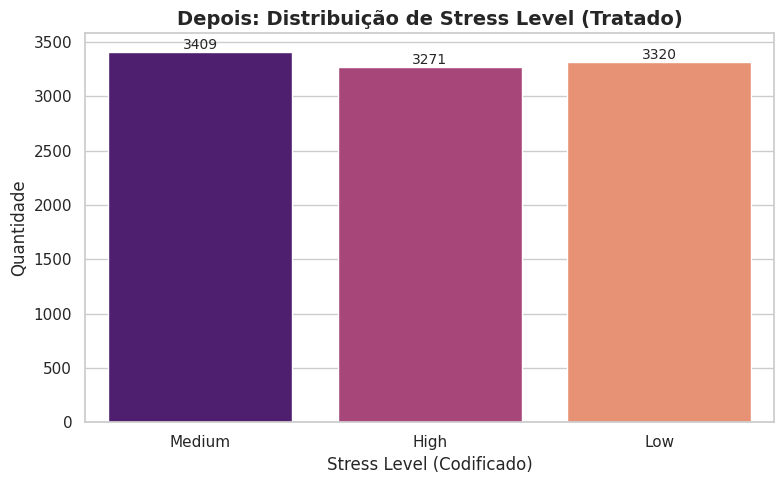

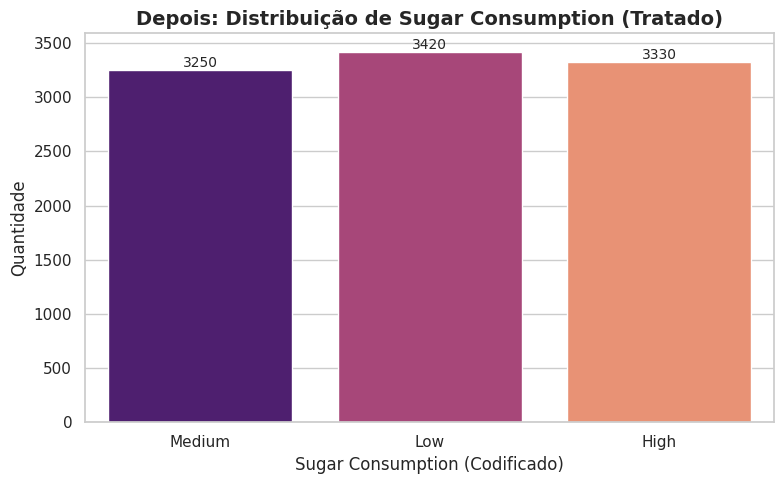

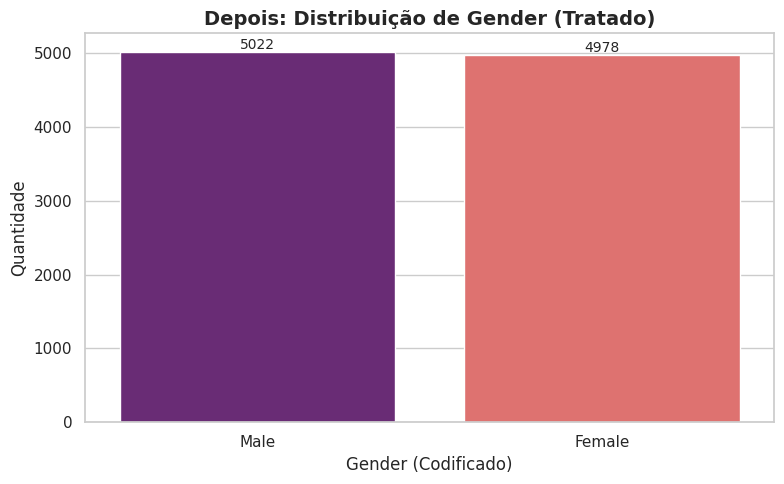

In [20]:
def gerar_graficos_depois(df):
    print("Gerando gráficos da distribuição APÓS TRATAMENTO...")
    for col in features:
        plt.figure(figsize=(8, 5))
        ax = sns.countplot(data=df, x=col, palette='magma', hue=col, legend=False)

        plt.title(f'Depois: Distribuição de {col} (Tratado)', fontsize=14, fontweight='bold')
        plt.xlabel(f'{col} (Codificado)')
        plt.ylabel('Quantidade')

        for p in ax.patches:
            if p.get_height() > 0: # Evita erros se a barra for zero
                ax.annotate(f'{int(p.get_height())}', (p.get_x() + p.get_width() / 2., p.get_height()),
                            ha='center', va='center', fontsize=10, xytext=(0, 5), textcoords='offset points')

        plt.tight_layout()
        plt.show()

gerar_graficos_depois(df_heart)

In [21]:
# one_hot_cols = [
#     '',
# ]

# encoder = OneHotEncoder(sparse_output=False) #Inicia o enconder retornando um array denso

# encoded_array = encoder.fit_transform(df_heart[one_hot_cols]) #transforma a coluna categórica em array

# encoded_df = pd.DataFrame(encoded_array, columns=encoder.get_feature_names_out(one_hot_cols))#cria um dataframe com com os novos valores

# df_heart = pd.concat([df_heart.drop(columns=one_hot_cols), encoded_df], axis=1,) #concactena com Dataframe sem as colunas antes do OneHotEncoder

# df_heart.head()

**LabelEnconder**

In [22]:
exercise_mapping = {'Low': 2, 'Medium': 1, 'High': 0} #.map() é usado para transformar os valores de uma coluna do DataFrame com base em um dicionário ou em uma função, no caso os valores eram Low, Medium, High, se tivesse outro valor e não fosse colocado ai, seria transformado em NaN.
df_heart['Exercise Habits'] = df_heart['Exercise Habits'].map(exercise_mapping)

alcohol_mapping = {'Low': 0, 'Medium': 1, 'High': 2}
df_heart['Alcohol Consumption'] = df_heart['Alcohol Consumption'].map(alcohol_mapping)

stress_mapping = {'Low': 0, 'Medium': 1, 'High': 2}
df_heart['Stress Level'] = df_heart['Stress Level'].map(stress_mapping)

sugar_mapping = {'Low': 0, 'Medium': 1, 'High': 2}
df_heart['Sugar Consumption'] = df_heart['Sugar Consumption'].map(sugar_mapping)

#Transformando os restos das features em LabelEnconder
number_columns = df_heart.select_dtypes(include=['object']).columns
for column in number_columns:
    le = LabelEncoder()
    df_heart[column] = le.fit_transform(df_heart[column])

# df_heart.head(4)
df_heart.isnull().sum()

,0
Age,0
Gender,0
Blood Pressure,0
Cholesterol Level,0
Exercise Habits,0
Smoking,0
Family Heart Disease,0
Diabetes,0
BMI,0
High Blood Pressure,0


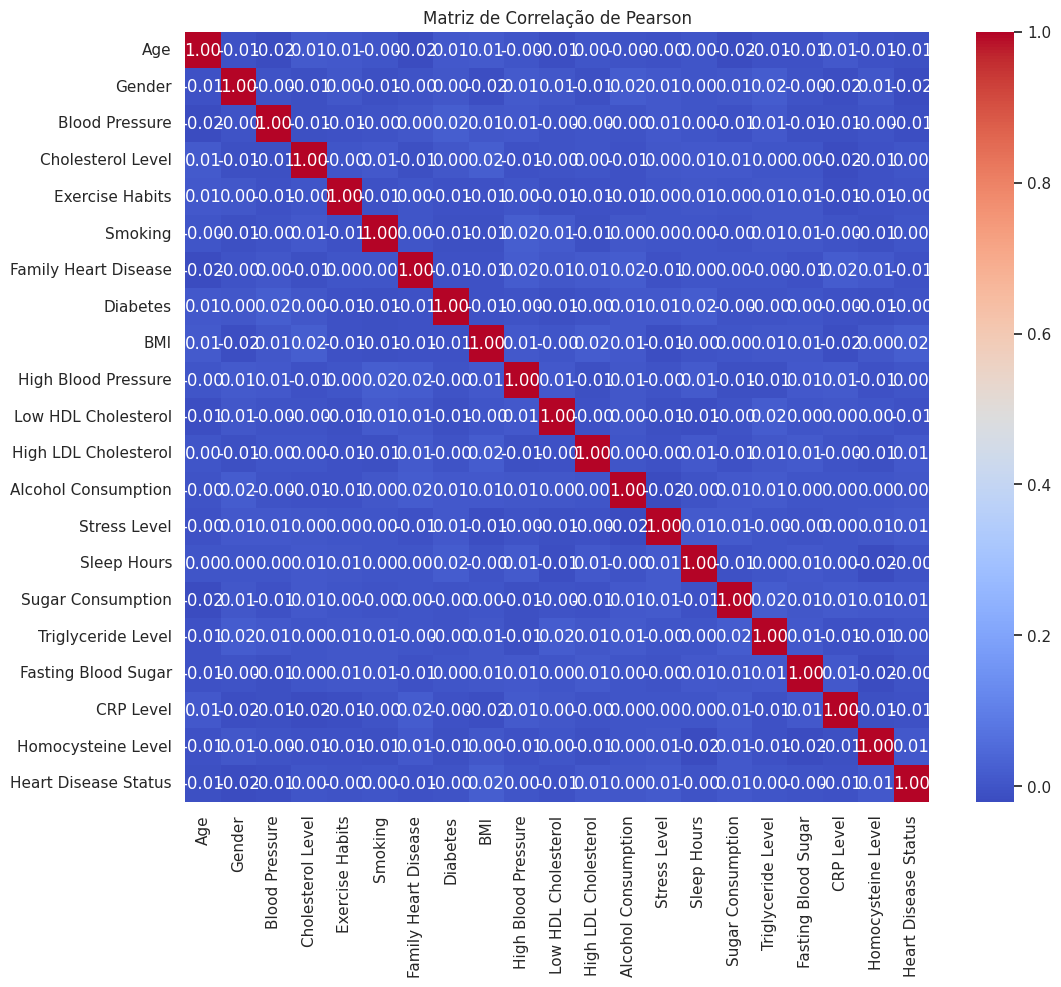

In [23]:
correlacao_matrix = df_heart.corr(method="pearson")

plt.figure(figsize=(12, 10))
sns.heatmap(correlacao_matrix, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Matriz de Correlação de Pearson")
plt.show()

In [24]:
X = df_heart.drop('Heart Disease Status', axis=1)
y = df_heart['Heart Disease Status']

In [25]:
X.head()

,Age,Gender,Blood Pressure,Cholesterol Level,Exercise Habits,Smoking,Family Heart Disease,Diabetes,BMI,High Blood Pressure,Low HDL Cholesterol,High LDL Cholesterol,Alcohol Consumption,Stress Level,Sleep Hours,Sugar Consumption,Triglyceride Level,Fasting Blood Sugar,CRP Level,Homocysteine Level
0,56,1,153.0,155.0,0,1,1,0,24.991591,1,1,0,2,1,7.633228,1,342.0,120.0,12.969246,12.387250
1,69,0,146.0,286.0,0,0,1,1,25.221799,0,1,0,1,2,8.744034,1,133.0,157.0,9.355389,19.298875
2,46,1,126.0,216.0,2,0,0,0,29.855447,0,1,1,0,0,4.440440,0,393.0,92.0,12.709873,11.230926
3,32,0,122.0,293.0,0,1,1,0,24.130477,1,0,1,0,2,5.249405,2,293.0,94.0,12.509046,5.961958
4,60,1,166.0,242.0,2,1,1,1,20.486289,1,0,0,0,2,7.030971,2,263.0,154.0,10.381259,8.153887


In [26]:
y.head()

,Heart Disease Status
0,0
1,0
2,0
3,0
4,0


# **Modelos**

In [27]:
modelos_lr = {
    'C': [0.01, 0.1, 1, 10],
    'max_iter': [1000],
    'solver': ['liblinear'],
    'penalty': ['l1', 'l2'],
}
modelos_knn = {
    'n_neighbors': [3, 5, 7, 9, 11],
    'metric': ['euclidean', 'manhattan', 'chebyshev', 'minkowski']
}
modelos_dtc = {
    'max_depth': [10, 20, 30, 40, 50],
    'criterion': ['gini', 'entropy'],
    'splitter': ['best', 'random'],
}
modelos_svm = {
    'C': [0.1, 1, 10],
    'kernel': ['linear', 'rbf']
}

modelos_xgb = {
    'max_depth': [3, 5, 7, 10],
    'booster': ['gbtree', 'gblinear', 'dart'],
    'n_estimators': [100, 200],
    'learning_rate': [0.1, 0.2],
    'subsample': [0.8, 1.0],
    'colsample_bytree': [0.8, 1.0]
}

# **Treinamento utilizando Recall**

In [28]:
X_recall = X.copy()
y_recall = y.copy()

In [ ]:
# Verifique a distribuição das classes antes do undersampling
print("Distribuição das classes antes do undersampling:")
print(y.value_counts())

# Configuração do UnderSampler
undersampler = NearMiss(sampling_strategy='auto')  # Equilibra as classes

outer_kf = KFold(n_splits=10, shuffle=True, random_state=42)

melhores_modelos_por_rodada = []

metrics = {'accuracy': [], 'recall': [], 'precision': [], 'f1': []}

undersampler = NearMiss(sampling_strategy='auto')

metricas_por_modelo_recall = {'Logistic Regression': [],'KNN': [],'Decision Tree': [],'SVM': [], 'XGBoost': []}

count = 1

for train_idx, test_idx in outer_kf.split(X_recall):
    print('-------------------Fold: ', count)
    count += 1

    X_train, X_test = X_recall.iloc[train_idx], X_recall.iloc[test_idx]
    y_train, y_test = y_recall.iloc[train_idx], y_recall.iloc[test_idx]

    X_train_Divided, X_val, y_train_Divided, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=42)

    #Undersampling
    X_train_resampled, y_train_resampled = undersampler.fit_resample(X_train_Divided, y_train_Divided)
    print("Distribuição das classes após o undersampling:")
    print(pd.Series(y_train_resampled).value_counts())

    #normalização
    final_scaler = MinMaxScaler()
    X_train_Divided_resampled_scaled = final_scaler.fit_transform(X_train_resampled)
    X_val_scaled = final_scaler.transform(X_val)

    final_scaler_f = MinMaxScaler()
    X_train_scaled = final_scaler_f.fit_transform(X_train)
    X_test_scaled = final_scaler_f.transform(X_test)

    acc_val_lr, recall_val_lr, precision_val_lr, f1_val_lr, par_lr = [], [], [], [], []
    acc_val_knn, recall_val_knn, precision_val_knn, f1_val_knn, par_knn = [], [], [], [], []
    acc_val_dtc, recall_val_dtc, precision_val_dtc, f1_val_dtc, par_dtc = [], [], [], [], []
    acc_val_svm, recall_val_svm, precision_val_svm, f1_val_svm, par_svm = [], [], [], [], []
    acc_val_xgb, recall_val_xgb, precision_val_xgb, f1_val_xgb, par_xgb = [], [], [], [], []


    for params_lr in ParameterGrid(modelos_lr):
      #Modelo lr
      try:
        lr = LogisticRegression(C=params_lr['C'],
                                max_iter=params_lr['max_iter'],
                                solver=params_lr['solver'],
                                penalty=params_lr['penalty'])

        lr.fit(X_train_Divided_resampled_scaled, y_train_resampled)
        y_pred = lr.predict(X_val_scaled)

        acc_lr = accuracy_score(y_val, y_pred)
        acc_val_lr.append(acc_lr)

        recall_lr = recall_score(y_val, y_pred, zero_division=np.nan)
        recall_val_lr.append(recall_lr)

        precision_lr = precision_score(y_val, y_pred, zero_division=np.nan)
        precision_val_lr.append(precision_lr)

        f1_lr = f1_score(y_val, y_pred, zero_division=np.nan)
        f1_val_lr.append(f1_lr)

        par_lr.append(params_lr)
      except Exception as e:
        print(f"Erro ao treinar LogisticRegression com params {params_lr}: {e}")


      print('Logistc Regression: ', par_lr[acc_val_lr.index(max(acc_val_lr))])
      print('Logistc Regression: ', par_lr[recall_val_lr.index(max(recall_val_lr))])
      print('Logistc Regression: ', par_lr[precision_val_lr.index(max(precision_val_lr))])
      print('Logistc Regression: ', par_lr[f1_val_lr.index(max(f1_val_lr))])

    #Modelo knn
    for params_knn in ParameterGrid(modelos_knn):
      try:
        knn = KNeighborsClassifier(n_neighbors=params_knn['n_neighbors'], metric=params_knn['metric'])
        knn.fit(X_train_Divided_resampled_scaled, y_train_resampled)
        y_pred = knn.predict(X_val_scaled)

        acc_knn = accuracy_score(y_val, y_pred)
        acc_val_knn.append(acc_knn)

        recall_knn = recall_score(y_val, y_pred, zero_division=np.nan)
        recall_val_knn.append(recall_knn)

        precision_knn = precision_score(y_val, y_pred, zero_division=np.nan)
        precision_val_knn.append(precision_knn)

        f1_knn = f1_score(y_val, y_pred, zero_division=np.nan)
        f1_val_knn.append(f1_knn)

        par_knn.append(params_knn)
      except Exception as e:
        print(f"Erro ao treinar KNN com params {params_knn}: {e}")

      print('KNN: ', par_knn[acc_val_knn.index(max(acc_val_knn))])
      print('KNN: ', par_knn[recall_val_knn.index(max(recall_val_knn))])
      print('KNN: ', par_knn[precision_val_knn.index(max(precision_val_knn))])
      print('KNN: ', par_knn[f1_val_knn.index(max(f1_val_knn))])

    #Modelo DecisionTreeClassifier
    for params_dtc in ParameterGrid(modelos_dtc):
      try:
        dtc = DecisionTreeClassifier(max_depth=params_dtc['max_depth'], criterion=params_dtc['criterion'], splitter=params_dtc['splitter'])
        dtc.fit(X_train_Divided_resampled_scaled, y_train_resampled)
        y_pred = dtc.predict(X_val_scaled)

        acc_dtc = accuracy_score(y_val, y_pred)
        acc_val_dtc.append(acc_dtc)

        recall_dtc = recall_score(y_val, y_pred)
        recall_val_dtc.append(recall_dtc)

        precision_dtc = precision_score(y_val, y_pred)
        precision_val_dtc.append(precision_dtc)

        f1_dtc = f1_score(y_val, y_pred)
        f1_val_dtc.append(f1_dtc)

        par_dtc.append(params_dtc)
      except Exception as e:
        print(f"Erro ao treinar DecisionTreeClassifier com params {params_dtc}: {e}")

      print('DecisionTreeClassifier', par_dtc[acc_val_dtc.index(max(acc_val_dtc))])
      print('DecisionTreeClassifier', par_dtc[recall_val_dtc.index(max(recall_val_dtc))])
      print('DecisionTreeClassifier', par_dtc[precision_val_dtc.index(max(precision_val_dtc))])
      print('DecisionTreeClassifier', par_dtc[f1_val_dtc.index(max(f1_val_dtc))])

    #Modelo SVM
    for params_svm in ParameterGrid(modelos_svm):
      try:
        svm = SVC(C=params_svm['C'], kernel=params_svm['kernel'])
        svm.fit(X_train_Divided_resampled_scaled, y_train_resampled)
        y_pred = svm.predict(X_val_scaled)

        acc_svm = accuracy_score(y_val, y_pred)
        acc_val_svm.append(acc_svm)

        recall_svm = recall_score(y_val, y_pred, zero_division=np.nan)
        recall_val_svm.append(recall_svm)

        precision_svm = precision_score(y_val, y_pred, zero_division=np.nan)
        precision_val_svm.append(precision_svm)

        f1_svm = f1_score(y_val, y_pred, zero_division=np.nan)
        f1_val_svm.append(f1_svm)

        par_svm.append(params_svm)
      except Exception as e:
        print(f"Erro ao treinar SVM com params {params_svm}: {e}")

      print('SMV: ', par_svm[acc_val_svm.index(max(acc_val_svm))])
      print('SMV: ', par_svm[recall_val_svm.index(max(recall_val_svm))])
      print('SMV: ', par_svm[precision_val_svm.index(max(precision_val_svm))])
      print('SMV: ', par_svm[f1_val_svm.index(max(f1_val_svm))])

    #Modelo XGB
    for params_xgb in ParameterGrid(modelos_xgb):
      try:
        xgb = XGBClassifier(max_depth=params_xgb['max_depth'],
                            booster=params_xgb['booster'],
                            n_estimators=params_xgb['n_estimators'],
                            learning_rate=params_xgb['learning_rate'],
                            subsample=params_xgb['subsample'],
                            colsample_bytree=params_xgb['colsample_bytree'])


        xgb.fit(X_train_Divided_resampled_scaled, y_train_resampled)
        y_pred = xgb.predict(X_val_scaled)

        acc_xgb = accuracy_score(y_val, y_pred)
        acc_val_xgb.append(acc_xgb)

        recall_xgb = recall_score(y_val, y_pred, zero_division=np.nan)
        recall_val_xgb.append(recall_xgb)

        precision_xgb = precision_score(y_val, y_pred, zero_division=np.nan)
        precision_val_xgb.append(precision_xgb)

        f1_xgb = f1_score(y_val, y_pred, zero_division=np.nan)
        f1_val_xgb.append(f1_xgb)

        par_xgb.append(params_xgb)

      except Exception as e:
          print(f"Erro ao treinar XGBoost com params {params_xgb}: {e}")
          continue

      print('XGBoost: ', par_xgb[acc_val_xgb.index(max(acc_val_xgb))])
      print('XGBoost: ', par_xgb[recall_val_xgb.index(max(recall_val_xgb))])
      print('XGBoost: ', par_xgb[precision_val_xgb.index(max(precision_val_xgb))])
      print('XGBoost: ', par_xgb[f1_val_xgb.index(max(f1_val_xgb))])


    best_lr = LogisticRegression(C = par_lr[recall_val_lr.index(max(recall_val_lr))]['C'],
                                 max_iter = par_lr[recall_val_lr.index(max(recall_val_lr))]['max_iter'],
                                 solver = par_lr[recall_val_lr.index(max(recall_val_lr))]['solver'],
                                 penalty = par_lr[recall_val_lr.index(max(recall_val_lr))]['penalty'])

    best_knn = KNeighborsClassifier(n_neighbors = par_knn[recall_val_knn.index(max(recall_val_knn))]['n_neighbors'],
                                    metric = par_knn[recall_val_knn.index(max(recall_val_knn))]['metric'])

    best_dtc = DecisionTreeClassifier(max_depth = par_dtc[recall_val_dtc.index(max(recall_val_dtc))]['max_depth'],
                                      criterion = par_dtc[recall_val_dtc.index(max(recall_val_dtc))]['criterion'],
                                      splitter = par_dtc[recall_val_dtc.index(max(recall_val_dtc))]['splitter'])

    best_svm = SVC(C = par_svm[recall_val_svm.index(max(recall_val_svm))]['C'],
                   kernel = par_svm[recall_val_svm.index(max(recall_val_svm))]['kernel'])

    best_xgb = XGBClassifier(max_depth = par_xgb[recall_val_xgb.index(max(recall_val_xgb))]['max_depth'],
                             booster = par_xgb[recall_val_xgb.index(max(recall_val_xgb))]['booster'],
                             n_estimators = par_xgb[recall_val_xgb.index(max(recall_val_xgb))]['n_estimators'],
                             learning_rate = par_xgb[recall_val_xgb.index(max(recall_val_xgb))]['learning_rate'],
                             subsample = par_xgb[recall_val_xgb.index(max(recall_val_xgb))]['subsample'],
                             colsample_bytree = par_xgb[recall_val_xgb.index(max(recall_val_xgb))]['colsample_bytree'])

    best_recall_lr = max(recall_val_lr)
    best_recall_knn = max(recall_val_knn)
    best_recall_dtc = max(recall_val_dtc)
    best_recall_svm = max(recall_val_svm)
    best_recall_xgb = max(recall_val_xgb)


    models_recall = {'Logistic Regression': (best_lr, best_recall_lr),
                     'KNN': (best_knn, best_recall_knn),
                     'Decision Tree': (best_dtc, best_recall_dtc),
                     'SVM': (best_svm, best_recall_svm),
                     'XGBoost': (best_xgb, best_recall_xgb)}

    # modelo com o melhor recall
    best_model_name = max(models_recall, key=lambda x: models_recall[x][1])#recebe nome do modelo com maior recall
    best_model = models_recall[best_model_name][0]#recebe os melhores hiperparametros desse modelo

    # nome do melhor modelo e seus hiperparâmetros
    print(f'Melhor modelo: {best_model_name}')
    print(f'Hiperparâmetros: {best_model.get_params()}')

    best_model.fit(X_train_Divided_resampled_scaled, y_train_resampled)
    y_pred_final = best_model.predict(X_test_scaled)

    conf_matrix = confusion_matrix(y_test, y_pred_final)
    ConfusionMatrixDisplay(conf_matrix).plot(cmap='Blues')
    plt.title('Matriz de Confusão')
    plt.show()

    acc_final = accuracy_score(y_test, y_pred_final)
    print('Acuracia: ',acc_final)
    metrics['accuracy'].append(acc_final)

    recall_final = recall_score(y_test, y_pred_final)
    print('Recall: ',recall_final)
    metrics['recall'].append(recall_final)

    precision_final = precision_score(y_test, y_pred_final)
    print('Precisão: ',precision_final)
    metrics['precision'].append(precision_final)

    f1_final = f1_score(y_test, y_pred_final)
    print('F1_score: ',f1_final)
    metrics['f1'].append(f1_final)

    melhores_modelos_por_rodada.append({
        'model_name': best_model_name,
        'model': best_model,
        'recall': models_recall[best_model_name][1],
        'accuracy': acc_final,
        'precision': precision_final,
        'f1': f1_final
    })

    for model_name, (model, recall) in models_recall.items():
        metricas_por_modelo_recall[model_name].append(recall)

Distribuição das classes antes do undersampling:
Heart Disease Status
0    8000
1    2000
Name: count, dtype: int64
-------------------Fold:  1
Distribuição das classes após o undersampling:
Heart Disease Status
0    1429
1    1429
Name: count, dtype: int64
Logistc Regression:  {'C': 0.01, 'max_iter': 1000, 'penalty': 'l1', 'solver': 'liblinear'}
Logistc Regression:  {'C': 0.01, 'max_iter': 1000, 'penalty': 'l1', 'solver': 'liblinear'}
Logistc Regression:  {'C': 0.01, 'max_iter': 1000, 'penalty': 'l1', 'solver': 'liblinear'}
Logistc Regression:  {'C': 0.01, 'max_iter': 1000, 'penalty': 'l1', 'solver': 'liblinear'}
Logistc Regression:  {'C': 0.01, 'max_iter': 1000, 'penalty': 'l1', 'solver': 'liblinear'}
Logistc Regression:  {'C': 0.01, 'max_iter': 1000, 'penalty': 'l2', 'solver': 'liblinear'}
Logistc Regression:  {'C': 0.01, 'max_iter': 1000, 'penalty': 'l1', 'solver': 'liblinear'}
Logistc Regression:  {'C': 0.01, 'max_iter': 1000, 'penalty': 'l2', 'solver': 'liblinear'}
Logistc Regres

In [ ]:
# Seleciona o melhor modelo baseado em RECALL
melhor_modelo_final = max(melhores_modelos_por_rodada, key=lambda x: x['recall'])

print(f'Melhor modelo final (baseado em Recall): {melhor_modelo_final["model_name"]}')
print(f'Hiperparâmetros: {melhor_modelo_final["model"].get_params()}')

# undersampling e normalização
X_resampled, y_resampled = undersampler.fit_resample(X_recall, y_recall)

final_scaler = MinMaxScaler()
X_resampled_scaled = final_scaler.fit_transform(X_resampled)

# Treino do melhor modelo final
melhor_modelo_final['model'].fit(X_resampled_scaled, y_resampled)
y_pred_f = melhor_modelo_final['model'].predict(X_resampled_scaled)

# Matriz de confusão
conf_matrix = confusion_matrix(y_resampled, y_pred_f)
cmd = ConfusionMatrixDisplay(confusion_matrix=conf_matrix, display_labels=['No', 'Yes'])
cmd.plot(cmap='Blues')

plt.title(f'Matriz de Confusão Final - {melhor_modelo_final["model_name"]} (Recall)')
plt.show()

acc = accuracy_score(y_resampled, y_pred_f) * 100
prec = precision_score(y_resampled, y_pred_f) * 100
rec = recall_score(y_resampled, y_pred_f) * 100
f1 = f1_score(y_resampled, y_pred_f) * 100

print(f"Desempenho Final no Treino - Foco Recall")
print(f"Acurácia:  {acc:.2f}%")
print(f"Precisão:  {prec:.2f}%")
print(f"Recall:    {rec:.2f}%")
print(f"F1-Score:  {f1:.2f}%")

In [ ]:
# Compare best model with others using Wilcoxon test
melhor_modelo_nome = melhor_modelo_final['model_name']
melhor_modelo_recall = metricas_por_modelo_recall[melhor_modelo_nome]

for modelo, recalls in metricas_por_modelo_recall.items():
    if modelo != melhor_modelo_nome:
      # Remove valores NaN de cada lista antes do teste
      recall_without_nan = [x for x in recalls if not np.isnan(x)]
      melhor_modelo_recall_without_nan = [x for x in melhor_modelo_recall if not np.isnan(x)]

      stat, p = wilcoxon(melhor_modelo_recall_without_nan, recall_without_nan)
      print(f"Wilcoxon Test - {melhor_modelo_nome} vs {modelo}")
      print(f"Estatística: {stat}, p-valor: {p}")

      if p < 0.05:
          print("Diferença significativa entre os modelos.\n")
      else:
          print("Sem diferença estatística significativa.\n")

# **Treinamento utilizando f1-score**

In [ ]:
# Criando cópias exclusivas para o treinamento focado em F1
X_f1 = X.copy()
y_f1 = y.copy()

In [ ]:
# Verifique a distribuição das classes antes do undersampling
print("Distribuição das classes antes do undersampling:")
print(y.value_counts())

# Configuração do UnderSampler
undersampler = NearMiss(sampling_strategy='auto')  # Equilibra as classes

outer_kf = KFold(n_splits=10, shuffle=True, random_state=42)

melhores_modelos_por_rodada = []

metrics = {'accuracy': [], 'recall': [], 'precision': [], 'f1': []}

undersampler = NearMiss(sampling_strategy='auto')

metricas_por_modelo_f1 = {'Logistic Regression': [],'KNN': [],'Decision Tree': [],'SVM': [], 'XGBoost': []}

count = 1

for train_idx, test_idx in outer_kf.split(X_f1):
    print('-------------------Fold: ', count)
    count += 1

    X_train, X_test = X_f1.iloc[train_idx], X_f1.iloc[test_idx]
    y_train, y_test = y_f1.iloc[train_idx], y_f1.iloc[test_idx]

    X_train_Divided, X_val, y_train_Divided, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=42)

    #Undersampling
    X_train_resampled, y_train_resampled = undersampler.fit_resample(X_train_Divided, y_train_Divided)
    print("Distribuição das classes após o undersampling:")
    print(pd.Series(y_train_resampled).value_counts())

    #normalização
    final_scaler = MinMaxScaler()
    X_train_Divided_resampled_scaled = final_scaler.fit_transform(X_train_resampled)
    X_val_scaled = final_scaler.transform(X_val)

    final_scaler_f = MinMaxScaler()
    X_train_scaled = final_scaler_f.fit_transform(X_train)
    X_test_scaled = final_scaler_f.transform(X_test)

    acc_val_lr, recall_val_lr, precision_val_lr, f1_val_lr, par_lr = [], [], [], [], []
    acc_val_knn, recall_val_knn, precision_val_knn, f1_val_knn, par_knn = [], [], [], [], []
    acc_val_dtc, recall_val_dtc, precision_val_dtc, f1_val_dtc, par_dtc = [], [], [], [], []
    acc_val_svm, recall_val_svm, precision_val_svm, f1_val_svm, par_svm = [], [], [], [], []
    acc_val_xgb, recall_val_xgb, precision_val_xgb, f1_val_xgb, par_xgb = [], [], [], [], []


    for params_lr in ParameterGrid(modelos_lr):
      #Modelo lr
      try:
        lr = LogisticRegression(C=params_lr['C'],
                                max_iter=params_lr['max_iter'],
                                solver=params_lr['solver'],
                                penalty=params_lr['penalty'])

        lr.fit(X_train_Divided_resampled_scaled, y_train_resampled)
        y_pred = lr.predict(X_val_scaled)

        acc_lr = accuracy_score(y_val, y_pred)
        acc_val_lr.append(acc_lr)

        recall_lr = recall_score(y_val, y_pred, zero_division=np.nan)
        recall_val_lr.append(recall_lr)

        precision_lr = precision_score(y_val, y_pred, zero_division=np.nan)
        precision_val_lr.append(precision_lr)

        f1_lr = f1_score(y_val, y_pred, zero_division=np.nan)
        f1_val_lr.append(f1_lr)

        par_lr.append(params_lr)
      except Exception as e:
        print(f"Erro ao treinar LogisticRegression com params {params_lr}: {e}")


      print('Logistc Regression: ', par_lr[acc_val_lr.index(max(acc_val_lr))])
      print('Logistc Regression: ', par_lr[recall_val_lr.index(max(recall_val_lr))])
      print('Logistc Regression: ', par_lr[precision_val_lr.index(max(precision_val_lr))])
      print('Logistc Regression: ', par_lr[f1_val_lr.index(max(f1_val_lr))])

    #Modelo knn
    for params_knn in ParameterGrid(modelos_knn):
      try:
        knn = KNeighborsClassifier(n_neighbors=params_knn['n_neighbors'], metric=params_knn['metric'])
        knn.fit(X_train_Divided_resampled_scaled, y_train_resampled)
        y_pred = knn.predict(X_val_scaled)

        acc_knn = accuracy_score(y_val, y_pred)
        acc_val_knn.append(acc_knn)

        recall_knn = recall_score(y_val, y_pred, zero_division=np.nan)
        recall_val_knn.append(recall_knn)

        precision_knn = precision_score(y_val, y_pred, zero_division=np.nan)
        precision_val_knn.append(precision_knn)

        f1_knn = f1_score(y_val, y_pred, zero_division=np.nan)
        f1_val_knn.append(f1_knn)

        par_knn.append(params_knn)
      except Exception as e:
        print(f"Erro ao treinar KNN com params {params_knn}: {e}")

      print('KNN: ', par_knn[acc_val_knn.index(max(acc_val_knn))])
      print('KNN: ', par_knn[recall_val_knn.index(max(recall_val_knn))])
      print('KNN: ', par_knn[precision_val_knn.index(max(precision_val_knn))])
      print('KNN: ', par_knn[f1_val_knn.index(max(f1_val_knn))])

    #Modelo DecisionTreeClassifier
    for params_dtc in ParameterGrid(modelos_dtc):
      try:
        dtc = DecisionTreeClassifier(max_depth=params_dtc['max_depth'], criterion=params_dtc['criterion'], splitter=params_dtc['splitter'])
        dtc.fit(X_train_Divided_resampled_scaled, y_train_resampled)
        y_pred = dtc.predict(X_val_scaled)

        acc_dtc = accuracy_score(y_val, y_pred)
        acc_val_dtc.append(acc_dtc)

        recall_dtc = recall_score(y_val, y_pred)
        recall_val_dtc.append(recall_dtc)

        precision_dtc = precision_score(y_val, y_pred)
        precision_val_dtc.append(precision_dtc)

        f1_dtc = f1_score(y_val, y_pred)
        f1_val_dtc.append(f1_dtc)

        par_dtc.append(params_dtc)
      except Exception as e:
        print(f"Erro ao treinar DecisionTreeClassifier com params {params_dtc}: {e}")

      print('DecisionTreeClassifier', par_dtc[acc_val_dtc.index(max(acc_val_dtc))])
      print('DecisionTreeClassifier', par_dtc[recall_val_dtc.index(max(recall_val_dtc))])
      print('DecisionTreeClassifier', par_dtc[precision_val_dtc.index(max(precision_val_dtc))])
      print('DecisionTreeClassifier', par_dtc[f1_val_dtc.index(max(f1_val_dtc))])

    #Modelo SVM
    for params_svm in ParameterGrid(modelos_svm):
      try:
        svm = SVC(C=params_svm['C'], kernel=params_svm['kernel'])
        svm.fit(X_train_Divided_resampled_scaled, y_train_resampled)
        y_pred = svm.predict(X_val_scaled)

        acc_svm = accuracy_score(y_val, y_pred)
        acc_val_svm.append(acc_svm)

        recall_svm = recall_score(y_val, y_pred, zero_division=np.nan)
        recall_val_svm.append(recall_svm)

        precision_svm = precision_score(y_val, y_pred, zero_division=np.nan)
        precision_val_svm.append(precision_svm)

        f1_svm = f1_score(y_val, y_pred, zero_division=np.nan)
        f1_val_svm.append(f1_svm)

        par_svm.append(params_svm)
      except Exception as e:
        print(f"Erro ao treinar SVM com params {params_svm}: {e}")

      print('SMV: ', par_svm[acc_val_svm.index(max(acc_val_svm))])
      print('SMV: ', par_svm[recall_val_svm.index(max(recall_val_svm))])
      print('SMV: ', par_svm[precision_val_svm.index(max(precision_val_svm))])
      print('SMV: ', par_svm[f1_val_svm.index(max(f1_val_svm))])

    #Modelo XGB
    for params_xgb in ParameterGrid(modelos_xgb):
      try:
        xgb = XGBClassifier(max_depth=params_xgb['max_depth'],
                            booster=params_xgb['booster'],
                            n_estimators=params_xgb['n_estimators'],
                            learning_rate=params_xgb['learning_rate'],
                            subsample=params_xgb['subsample'],
                            colsample_bytree=params_xgb['colsample_bytree'])


        xgb.fit(X_train_Divided_resampled_scaled, y_train_resampled)
        y_pred = xgb.predict(X_val_scaled)

        acc_xgb = accuracy_score(y_val, y_pred)
        acc_val_xgb.append(acc_xgb)

        recall_xgb = recall_score(y_val, y_pred, zero_division=np.nan)
        recall_val_xgb.append(recall_xgb)

        precision_xgb = precision_score(y_val, y_pred, zero_division=np.nan)
        precision_val_xgb.append(precision_xgb)

        f1_xgb = f1_score(y_val, y_pred, zero_division=np.nan)
        f1_val_xgb.append(f1_xgb)

        par_xgb.append(params_xgb)

      except Exception as e:
          print(f"Erro ao treinar XGBoost com params {params_xgb}: {e}")
          continue

      print('XGBoost: ', par_xgb[acc_val_xgb.index(max(acc_val_xgb))])
      print('XGBoost: ', par_xgb[recall_val_xgb.index(max(recall_val_xgb))])
      print('XGBoost: ', par_xgb[precision_val_xgb.index(max(precision_val_xgb))])
      print('XGBoost: ', par_xgb[f1_val_xgb.index(max(f1_val_xgb))])


    best_lr = LogisticRegression(C = par_lr[f1_val_lr.index(max(f1_val_lr))]['C'],
                                 max_iter = par_lr[f1_val_lr.index(max(f1_val_lr))]['max_iter'],
                                 solver = par_lr[f1_val_lr.index(max(f1_val_lr))]['solver'],
                                 penalty = par_lr[f1_val_lr.index(max(f1_val_lr))]['penalty'])

    best_knn = KNeighborsClassifier(n_neighbors = par_knn[f1_val_knn.index(max(f1_val_knn))]['n_neighbors'],
                                    metric = par_knn[f1_val_knn.index(max(f1_val_knn))]['metric'])

    best_dtc = DecisionTreeClassifier(max_depth = par_dtc[f1_val_dtc.index(max(f1_val_dtc))]['max_depth'],
                                      criterion = par_dtc[f1_val_dtc.index(max(f1_val_dtc))]['criterion'],
                                      splitter = par_dtc[f1_val_dtc.index(max(f1_val_dtc))]['splitter'])

    best_svm = SVC(C = par_svm[f1_val_svm.index(max(f1_val_svm))]['C'],
                   kernel = par_svm[f1_val_svm.index(max(f1_val_svm))]['kernel'])

    best_xgb = XGBClassifier(max_depth = par_xgb[f1_val_xgb.index(max(f1_val_xgb))]['max_depth'],
                             booster = par_xgb[f1_val_xgb.index(max(f1_val_xgb))]['booster'],
                             n_estimators = par_xgb[f1_val_xgb.index(max(f1_val_xgb))]['n_estimators'],
                             learning_rate = par_xgb[f1_val_xgb.index(max(f1_val_xgb))]['learning_rate'],
                             subsample = par_xgb[f1_val_xgb.index(max(f1_val_xgb))]['subsample'],
                             colsample_bytree = par_xgb[f1_val_xgb.index(max(f1_val_xgb))]['colsample_bytree'])

    best_f1_lr = max(f1_val_lr)
    best_f1_knn = max(f1_val_knn)
    best_f1_dtc = max(f1_val_dtc)
    best_f1_svm = max(f1_val_svm)
    best_f1_xgb = max(f1_val_xgb)


    models_f1 = {'Logistic Regression': (best_lr, best_f1_lr),
                     'KNN': (best_knn, best_f1_knn),
                     'Decision Tree': (best_dtc, best_f1_dtc),
                     'SVM': (best_svm, best_f1_svm),
                     'XGBoost': (best_xgb, best_f1_xgb)}

    # modelo com o melhor recall
    best_model_name = max(models_f1, key=lambda x: models_f1[x][1])#recebe nome do modelo com maior recall
    best_model = models_f1[best_model_name][0]#recebe os melhores hiperparametros desse modelo

    # nome do melhor modelo e seus hiperparâmetros
    print(f'Melhor modelo: {best_model_name}')
    print(f'Hiperparâmetros: {best_model.get_params()}')

    best_model.fit(X_train_Divided_resampled_scaled, y_train_resampled)
    y_pred_final = best_model.predict(X_test_scaled)

    conf_matrix = confusion_matrix(y_test, y_pred_final)
    ConfusionMatrixDisplay(conf_matrix).plot(cmap='Blues')
    plt.title('Matriz de Confusão')
    plt.show()

    acc_final = accuracy_score(y_test, y_pred_final)
    print('Acuracia: ',acc_final)
    metrics['accuracy'].append(acc_final)

    recall_final = recall_score(y_test, y_pred_final)
    print('Recall: ',recall_final)
    metrics['recall'].append(recall_final)

    precision_final = precision_score(y_test, y_pred_final)
    print('Precisão: ',precision_final)
    metrics['precision'].append(precision_final)

    f1_final = f1_score(y_test, y_pred_final)
    print('F1_score: ',f1_final)
    metrics['f1'].append(f1_final)

    melhores_modelos_por_rodada.append({
        'model_name': best_model_name,
        'model': best_model,
        'f1_score_val': models_f1[best_model_name][1], # F1 obtido na validação
        'accuracy': acc_final,
        'recall': recall_final,
        'precision': precision_final,
        'f1': f1_final
    })

    for model_name, (model, f1_val) in models_f1.items():
        metricas_por_modelo_f1[model_name].append(f1_val)

In [ ]:
# Seleciona o melhor modelo
melhor_modelo_final = max(melhores_modelos_por_rodada, key=lambda x: x['f1'])

print(f'Melhor modelo final (baseado em F1): {melhor_modelo_final["model_name"]}')
print(f'Hiperparâmetros: {melhor_modelo_final["model"].get_params()}')

# undersampling e normalização
X_resampled, y_resampled = undersampler.fit_resample(X_f1, y_f1)
final_scaler = MinMaxScaler()
X_resampled_scaled = final_scaler.fit_transform(X_resampled)

# Treino final e predição
melhor_modelo_final['model'].fit(X_resampled_scaled, y_resampled)
y_pred_f = melhor_modelo_final['model'].predict(X_resampled_scaled)

# Matriz de Confusão
conf_matrix = confusion_matrix(y_resampled, y_pred_f)
cmd = ConfusionMatrixDisplay(confusion_matrix=conf_matrix, display_labels=['No', 'Yes'])
cmd.plot(cmap='Blues')

plt.title(f'Matriz de Confusão Final - {melhor_modelo_final["model_name"]} (F1)')
plt.show()

acc = accuracy_score(y_resampled, y_pred_f) * 100
prec = precision_score(y_resampled, y_pred_f) * 100
rec = recall_score(y_resampled, y_pred_f) * 100
f1 = f1_score(y_resampled, y_pred_f) * 100

print(f"Desempenho foco F1-Score")
print(f"Acurácia:  {acc:.2f}%")
print(f"Precisão:  {prec:.2f}%")
print(f"Recall:    {rec:.2f}%")
print(f"F1-Score:  {f1:.2f}%")

In [ ]:
melhor_modelo_nome = melhor_modelo_final['model_name']
melhor_modelo_f1_historico = metricas_por_modelo_f1[melhor_modelo_nome]

for modelo, f1_scores in metricas_por_modelo_f1.items():
    if modelo != melhor_modelo_nome:
        # Remove valores NaN de cada lista antes do teste
        f1_without_nan = [x for x in f1_scores if not np.isnan(x)]
        melhor_modelo_f1_without_nan = [x for x in melhor_modelo_f1_historico if not np.isnan(x)]

        stat, p = wilcoxon(melhor_modelo_f1_without_nan, f1_without_nan)

        print(f"Wilcoxon Test - {melhor_modelo_nome} vs {modelo} (Métrica: F1-Score)")
        print(f"Estatística: {stat}, p-valor: {p}")

        if p < 0.05:
            print("Diferença significativa entre os modelos.\n")
        else:
            print("Sem diferença estatística significativa.\n")